# Point estimators

* A point estimator is an algorithm or function that given a set of data points $\boldsymbol{x}_1,\ldots,\boldsymbol{x}_n$ outputs a real value.
* A good point estimator tries to approximate some characteristic of the data set and its value converges to the true value in the process $n\to \infty$

## I. Theoretical formalisation
* Let $\mathcal{D}_{\alpha_1,\alpha_2,\ldots,\alpha_k}$ be a parametrised distribution that generates samples $\boldsymbol{x}_i$. 
* Then we might want to infer what are the values of $\alpha_1,\alpha_2,\ldots,\alpha_k$ form obsereved data.
* We can use point estimator $f$ for estimating the value of $\alpha_i$.
* As data generation is random process point estimator outcomes $y=f(\boldsymbol{x}_1,\ldots,\boldsymbol{x}_n)$ are also random.

In [30]:
import numpy as np
import pandas as pd

from pandas import Series
from pandas import DataFrame

from plotnine import *

# Local imports
from convenience import *

In [10]:
def data_sampler(n:int, mu:float=0,  sigma: float=1) -> Series:
    """
    Data generator that generates n values form the normal distribution N(mu, sigma)
    """
    
    return Series(np.random.normal(loc=mu, scale=sigma, size = n))

In [11]:
data_sampler(10)

0   -0.378772
1   -1.045941
2   -0.576092
3    1.344149
4   -2.265135
5    0.074638
6    0.089495
7   -0.121285
8    1.121380
9    0.791103
dtype: float64

For this particular data distribution there are parameters we can estimate $\mu$ and $\sigma$. 
Let us consider three point estimators for the $\mu$ value

In [45]:
def f0(x):
    return 0

def f1(x):
    return np.mean(x)

def f2(x):
    return np.random.uniform(-1,1,1)

Then the corresponding distributions of the point estimator values can be empirically measured.

In [46]:
k = 100
sample_size = [1, 10, 100, 1000] 

result = (combine_categories({'sample_size': sample_size, 'method': ['f0', 'f1', 'f2'], 'experiment': list(range(k))})
         .assign(value = np.nan)
         .set_index(['sample_size', 'method', 'experiment'])
         .sort_index())
head(result)

value
sample_size method experiment       
1           f0     0             NaN
                   1             NaN
                   2             NaN
                   3             NaN
                   4             NaN

In [47]:
from tqdm.notebook import trange

for size in sample_size:
    for experiment in trange(k, desc = 'Size: {:_>4}'.format(size)):
        data = data_sampler(size)
        result.loc[(size, 'f0', experiment), 'value'] = f0(data)
        result.loc[(size, 'f1', experiment), 'value'] = f1(data)
        result.loc[(size, 'f2', experiment), 'value'] = f2(data)
tail(result)

value
sample_size method experiment          
1000        f2     95          0.716356
                   96         -0.766925
                   97         -0.937299
                   98          0.228817
                   99         -0.617085

Let us explore the resulting distributions

/opt/anaconda3/envs/machine-learning/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 4 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/opt/anaconda3/envs/machine-learning/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 36 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


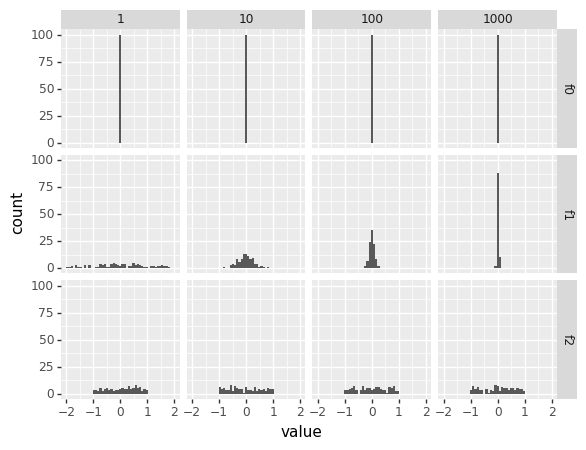

<ggplot: (7018484586)>

In [50]:
p = ggplot(result.reset_index())
p = p + geom_histogram(aes(x='value'), bins=50)
p = p + facet_grid(['method', 'sample_size']) + xlim(-2, 2)
p

## II. Bias and variance 

* A point estimator does not have to provide the correct answer.
* A point estimator is unbiased if its expected value coincides with the true parameter value.
* A statistical variance of the point estimator shows how much a point estimate fluctuates.
* A point estimator is reasonable if its variance decreases as $n\to\infty$.
* A point estimator is asymptotocally consistent if the estimator converges in probabilty to the true value.
* A biased estimator can be also asymptotocally consistent and more effective.

In [56]:
sdf = (result
       .groupby(['method', 'sample_size'])
       .aggregate(
           mean = ('value', np.mean), 
           std  = ('value', np.std)),
           q05  = ('value', lambda x: np.quantile(x, q=0.05)),
           q95  = ('value', lambda x: np.quantile(x, q=0.95))
      )

sdf


mean       std
method sample_size                    
f0     1            0.000000  0.000000
       10           0.000000  0.000000
       100          0.000000  0.000000
       1000         0.000000  0.000000
f1     1            0.080431  1.090166
       10          -0.012206  0.292961
       100          0.001481  0.094442
       1000         0.003518  0.027485
f2     1            0.082865  0.566240
       10          -0.056674  0.602973
       100          0.002385  0.571213
       1000         0.006149  0.586626